In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

sns.set()
%matplotlib inline

### Generate Data

Text(0.5,1,'Test Data')

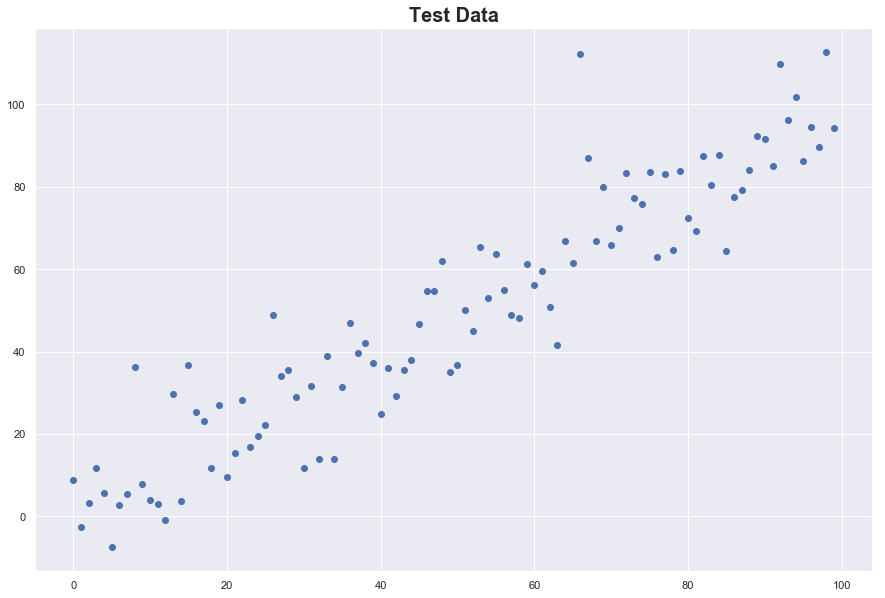

In [3]:
# Number of points
n_points = 100

# Add noise
dispersion = np.random.randint(low = 5, high = 30)

# Define X & Y
x_test = np.arange(n_points)
y_test = dispersion * np.random.randn(n_points) + x_test 

plt.figure(figsize = (15,10))
plt.scatter(x_test,y_test)
plt.title("Test Data", fontsize = 20, fontweight='bold')

### Define Loss Function

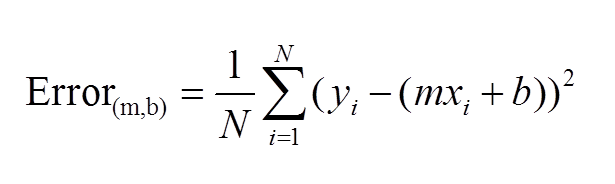

In [9]:
# Mean Squared Error (MSE)
def error_sum(x, y, slope, intercept):
        return (sum((y - slope * x - intercept)**2))/ n_points

In [10]:
def guess_line(slope, intercept):
    x = np.arange(100)
    y = x * slope + intercept
    plt.figure(figsize = (15,10))
    plt.ylim([-20,200])
    plt.xlim([-5,100])
    
    # Show Equation of Line
    plt.text(10, 85, s = "y = {}*x + {}".format(slope,intercept), fontsize = 15, fontweight='bold')
    
    # Call Loss Function
    plt.text(10, 75, s = "Error = {:.0f}".format(error_sum(x_test,y_test,slope,intercept)), fontsize = 15, fontweight='bold')
    
    # Plot Graph
    plt.title(" Interactive Line of Best Fit Visualization", fontsize = 20, fontweight='bold')
    plt.plot(x,y, 'r')
    plt.scatter(x_test,y_test)
    plt.show()

interact(guess_line, slope = (0,2,0.1), intercept  = (0,20))

interactive(children=(FloatSlider(value=1.0, description='slope', max=2.0), IntSlider(value=10, description='i…

<function __main__.guess_line(slope, intercept)>

### Gradient Descent Algorithm

#### Step 1: Calculate Derivatve of Loss Function

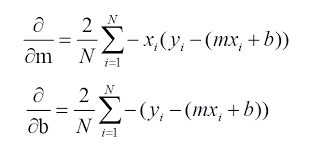



#### Step 2: Update Weights: New Weight = Current Weight - (Learning Rate (a) * Gradient)


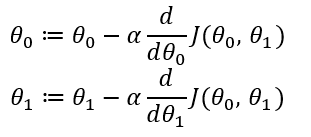

In [13]:
#Number of Iterations (Number dependent on learning rate)
epochs = 20

#Very sensitive to this number - anything larger and it will not converge
learning_rate = 0.00003


#Set initial values
m_guess = 0
b_guess = 0

#Store values
guesses = np.zeros((epochs + 1, 3))
guesses[0] = [0, 0, error_sum(x_test, y_test, m_guess, b_guess)]

for x in range(1, epochs + 1):
    y_new = (m_guess * x_test) + b_guess
    
    # Take derivative of loss function with respect to slope and intercept
    m_grad = -2/n_points *  sum(x_test * (y_test - y_new))
    b_grad = -2/n_points *  sum(y_test - y_new)
    
    
    #Update guess of slope and intercept
    m_guess -= (learning_rate * m_grad)
    b_guess -= (learning_rate * b_grad)
    error = error_sum(x_test, y_test, m_guess, b_guess)
    
    #Store iterated values of slope and intercept (only need for next visualization)
    guesses[x] = [m_guess, b_guess, error]
 

### Plot Gradient Descent

Text(0.5,1,'Gradient Decent')

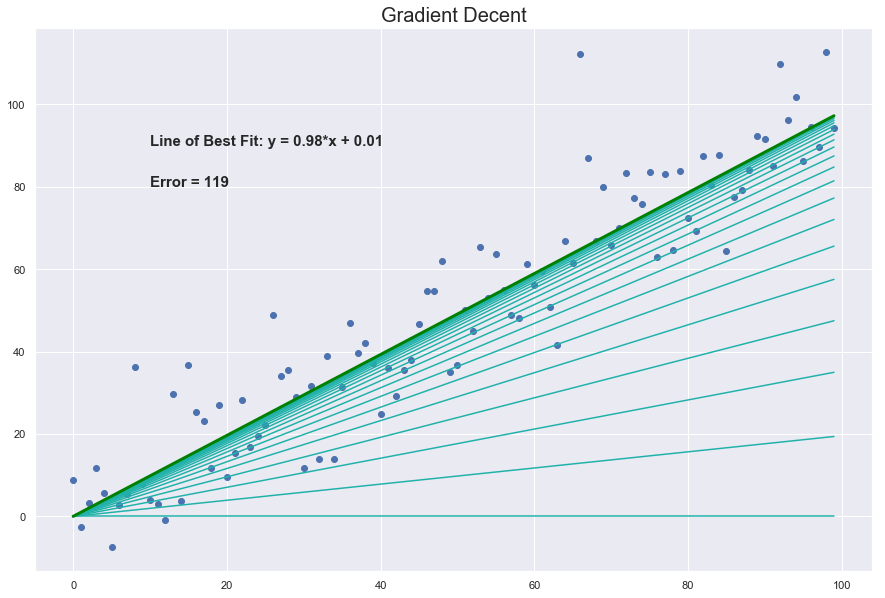

In [14]:
plt.figure(figsize = (15,10))
plt.scatter(x_test,y_test)

## Loop through updated values (slope & intercept)
for i in range(len(guesses)-1):
    plt.plot(x_test * guesses[i][0] + guesses[i][1], 'lightseagreen')

# Show Best Line
plt.plot(x_test* guesses[-1][0] + guesses[-1][1], 'green', linewidth = 3)

## Get Final Value
best_m = guesses[-1][0]
best_b = guesses[-1][1]


plt.text(10, 90, s = "Line of Best Fit: y = {:.2f}*x + {:.2f}".format(best_m, best_b ), fontsize = 15, fontweight='bold')
plt.text(10, 80, s = "Error = {:.0f}".format(error_sum(x_test,y_test, best_m, best_b)), fontsize = 15, fontweight='bold')
plt.title("Gradient Decent", fontsize = 20)

Text(1.28173,118.636,'Global Minimum')

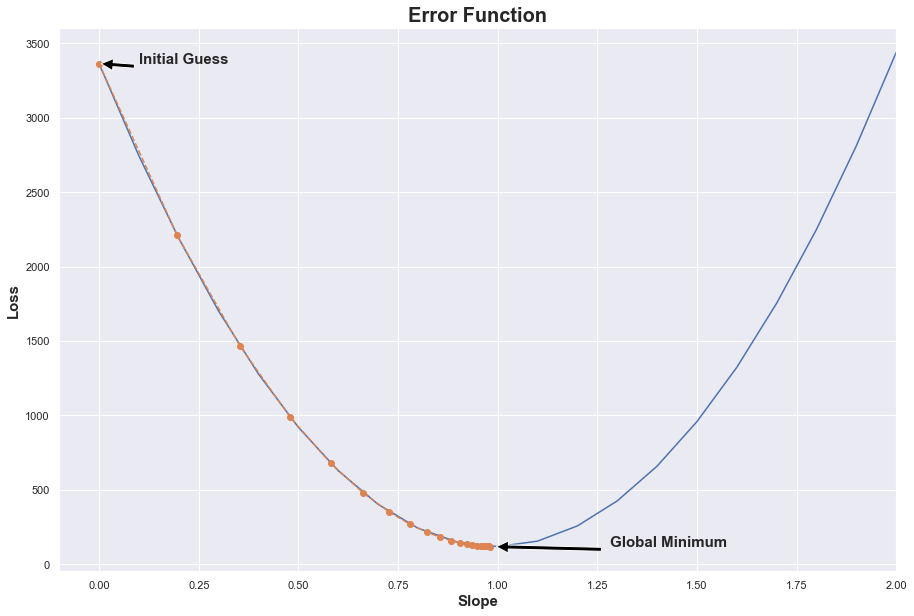

In [15]:
## Visualization of error minimization as a function of slope
y_error = []
x_error = np.arange(0,2.1,0.1)
for x in x_error:
    y_error.append(error_sum(x_test,y_test, x, 0))


plt.figure(figsize = (15,10))
plt.xlim([-0.1,2])
plt.plot(x_error,y_error)
plt.plot(guesses[:,0], guesses[:,2], linestyle='--', marker='o',)
plt.title("Error Function", fontsize = 20, fontweight='bold')
plt.xlabel("Slope", fontsize = 15, fontweight='bold')
plt.ylabel("Loss", fontsize = 15, fontweight='bold')


# Get First and Last Values
first_point = [guesses[0,0], guesses[0,2]]
last_point = [guesses[-1,0], guesses[-1,2]]

## Annotate First and Last Values
plt.annotate("Initial Guess", xy = (first_point), xytext=(first_point[0] + 0.1, first_point[1]), 
             fontsize = 15, fontweight='bold', arrowprops=dict(facecolor='black', shrink=0.05),)

plt.annotate("Global Minimum", xy = (last_point), xytext=(last_point[0] + 0.3, last_point[1]), 
             fontsize = 15, fontweight='bold', arrowprops=dict(facecolor='black', shrink=0.05),)